# Clasificación multiclase

Ya hemos construido nuestro primer modelo de clasificación binario. Comenzamos por una sola variable independiente, introducimos varias, y ahora haremos una extensión importante: **clasificación con más de dos categorías**. Un ejemplo de esto podría ser el aprender una función que, con las coordenadas de latitud y longitud de un punto geográfico dentro del territorio nacional, nos devuelve una de las siguientes:

- Una etiqueta $\texttt{provincia} \in \left\{\texttt{San Jose}, \texttt{Alajuela}, \texttt{Cartago}, \texttt{Heredia}, \texttt{Guanacaste}, \texttt{Puntarenas}, \texttt{Limon} \right\}$. O, en su defecto,
- Un vector $\mathbf{y}$ con siete valores que denotan la probabilidad de que el punto indicado se encuentre en una provincia dada, de modo que $\sum_{i=1}^{7} y_i = 1$.


### El dataset de los lirios

![image](img/lirios.png)

<center>Imagen tomada de <a href="https://www.datacamp.com/community/tutorials/machine-learning-in-r/">Machine Learning in R for beginners</a></center>

Para este notebook, haremos uso de uno de los datasets más famosos y antiguos de la historia de la estadística: los **datos de los lirios de Fisher**, conocido en inglés como el *Iris dataset*. Este dataset contiene muestras de mediciones de lirios, con cinco columnas: **la longitud y ancho del pétalo y del sépalo, respectivamente**, y una etiqueta que indica la especie de lirio al que corresponde, que puede ser *versicolor*, *virginica* o *setosa*. Nuestro objetivo, entonces, es aprender una de las dos funciones, de acuerdo con las descripciones que dimos arriba 

- $f\left(\texttt{l}\_\texttt{petalo}, \texttt{a}\_\texttt{petalo}, \texttt{l}\_\texttt{sepalo}, \texttt{a}\_\texttt{sepalo} \right) \mapsto \left\{\texttt{versicolor}, \texttt{virginica}, \texttt{setosa}  \right\}$. Es decir, nuestra función retorna una **etiqueta específica** sin mención a su probabilidad—sin embargo, inferimos que es más probable que las otras dos

- $f\left(\texttt{l}\_\texttt{petalo}, \texttt{a}\_\texttt{petalo}, \texttt{l}\_\texttt{sepalo}, \texttt{a}\_\texttt{sepalo} \right) \mapsto \left[ p\left(\texttt{versicolor}\right), p\left(\texttt{virginica} \right), p\left(\texttt{setosa} \right)\right]$. Es decir, un **vector de probabilidades**, de modo que $p\left(\texttt{versicolor}\right) + p\left(\texttt{virginica} \right) + p\left(\texttt{setosa} \right) = 1$

In [9]:
# Cargamos nuestras bibliotecas importantes
import numpy as np
import matplotlib.pyplot as plt

# Carga el dataset de los lirios
l_petalo = [1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4, 1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1, 1.7, 1.9, 1.6, 1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3, 1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5, 4.9, 4, 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4, 4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4, 4.9, 4.7, 4.3, 4.4, 4.8, 5, 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4, 4.4, 4.6, 4, 3.3, 4.2, 4.2, 4.2, 4.3, 3, 4.1, 6, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5, 5.1, 5.3, 5.5, 6.7, 6.9, 5, 5.7, 4.9, 6.7, 4.9, 5.7, 6, 4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5, 5.2, 5.4, 5.1]
a_petalo = [0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1, 0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2, 0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2, 0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1, 1.3, 1.4, 1, 1.5, 1, 1.4, 1.3, 1.4, 1.5, 1, 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7, 1.5, 1, 1.1, 1, 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2, 1.4, 1.2, 1, 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8, 2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2, 1.9, 2.1, 2, 2.4, 2.3, 1.8, 2.2, 2.3, 1.5, 2.3, 2, 2, 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6, 1.9, 2, 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9, 2.3, 2.5, 2.3, 1.9, 2, 2.3, 1.8]
l_sepalo = [5.1, 4.9, 4.7, 4.6, 5, 5.4, 4.6, 5, 4.4, 4.9, 5.4, 4.8, 4.8, 4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5, 5, 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5, 5.5, 4.9, 4.4, 5.1, 5, 4.5, 4.4, 5, 5.1, 4.8, 5.1, 4.6, 5.3, 5, 7, 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5, 5.9, 6, 6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7, 6, 5.7, 5.5, 5.5, 5.8, 6, 5.4, 6, 6.7, 6.3, 5.6, 5.5, 5.5, 6.1, 5.8, 5, 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]
a_sepalo = [3.5, 3, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3, 3, 4, 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3, 3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3, 3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3, 3.8, 3.2, 3.7, 3.3, 3.2, 3.2, 3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2, 3, 2.2, 2.9, 2.9, 3.1, 3, 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3, 2.8, 3, 2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3, 3.4, 3.1, 2.3, 3, 2.5, 2.6, 3, 2.6, 2.3, 2.7, 3, 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3, 2.9, 3, 3, 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3, 2.5, 2.8, 3.2, 3, 3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3, 2.8, 3, 2.8, 3.8, 2.8, 2.8, 2.6, 3, 3.4, 3.1, 3, 3.1, 3.1, 3.1, 2.7, 3.2, 3.3, 3, 2.5, 3, 3.4, 3]
especie = ['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica']

# Creamos una matriz de diseño con las variables independientes
datos_x = np.array((l_petalo, a_petalo, l_sepalo, a_sepalo)).transpose()

## Clasificación uno-contra-todos

La primera técnica de clasificación multiclase que veremos es la denominada **uno-contra-todos** (en inglés *one-vs-all*). Esta es una **técnica general** que puede ser aplicada a **cualquier modelo de clasificación binario** y no solo a la regresión logística. De hecho, esta técnica es de uso común en modelos que no tienen una generalización multiclase natural, como las **máquinas de soporte vectorial** (SVMs). 

La técnica es simple y consiste en entrenar **un modelo de clasificación binaria separado para cada etiqueta**. Por ejemplo, en nuestro ejemplo de las provincias, tendríamos que entrenar **siete** modelos distintos. En el caso de los lirios, entrenaremos **tres modelos distintos**, cada uno de la forma $$f\left(\texttt{l}\_\texttt{petalo}, \texttt{a}\_\texttt{petalo}, \texttt{l}\_\texttt{sepalo}, \texttt{a}\_\texttt{sepalo} \right) \mapsto [0,1]$$ de modo que, por ejemplo, el modelo de ``versicolor`` es un modelo que nos devuelve la probabilidad de que el lirio sea de especie *versicolor*, y de igual manera con ``virginica`` y ``setosa``.

Para poder hacer esto, a la hora de entrenar los tres modelos, tenemos que crear un **vector de entrenamiento distinto para cada uno**, en el que la variable dependiente está codificada de manera binaria de acuerdo a la etiqueta correspondiente. Por ejemplo, el modelo que entrenaremos para ``setosa`` tendrá un vector ``especie_setosa`` codificado de modo que ``1=setosa`` y ``0=todo-lo-que-no-es-setosa``. Lo haremos de modo similar con los otros dos.


In [10]:
# Codificamos el vector 'especie' para los tres clasificadores distintos
especie_setosa = np.array([1.0 if x=='setosa' else 0.0 for x in especie])
especie_virginica = np.array([1.0 if x=='virginica' else 0.0 for x in especie])
especie_versicolor = np.array([1.0 if x=='versicolor' else 0.0 for x in especie])

Ahora, procederemos a generar nuestros tres modelos de regresión logística. Pero antes, retomemos nuestro código de gradiente descendiente del notebook previo, con leves modificaciones. 

In [25]:
# Función sigmoide y su derivada
def sig(x):
    return 1.0 / (1.0 + np.exp(-x))

def d_sig(x):
    return sig(x) * (1.0 - sig(x))

# Función de error y su derivada
def bce(y_real, y_pred):
    return np.sum(-y_real*np.log(y_pred) - (1.0 - y_real)*np.log(1.0 - y_pred))

def d_bce(y_real, y_pred):
    return (y_pred - y_real) / (y_pred * (1.0-y_pred))

# Cálculo de gradientes
def grads(x, y_real, cur_alpha, cur_beta):    
    f_val = np.dot(x, cur_alpha) + cur_beta
    y_pred = sig(f_val)
    d_err = d_bce(y_real, y_pred)
    d_f_val = d_sig(f_val)
    d_alpha = np.dot(d_err * d_f_val, x)
    d_beta = np.sum(d_err * d_f_val)
    return (d_alpha, d_beta)

# Función de optimización con gradiente descendiente
def gd(x, y, lr=0.001, num_iter=1000):
    M = x.shape[1]
    alpha = np.random.randn(M)
    [beta] = np.random.randn(1)
    errs = []
    
    for ix in range(num_iter):
        pred = sig(np.dot(x, alpha) + beta)
        err = bce(y, pred)
        (d_alpha, d_beta) = grads(x, y, alpha, beta)
        alpha = alpha - lr*d_alpha
        beta = beta - lr*d_beta
        errs.append(err)
        
    return (errs,alpha,beta)

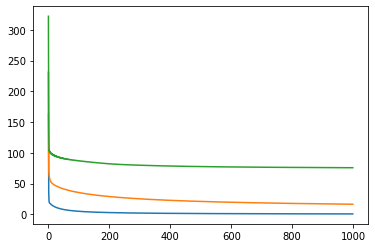

In [31]:
# Entrenemos los tres modelos
(errs_setosa, alpha_setosa, beta_setosa) = gd(datos_x, especie_setosa)
(errs_virginica, alpha_virginica, beta_virginica) = gd(datos_x, especie_virginica)
(errs_versicolor, alpha_versicolor, beta_versicolor) = gd(datos_x, especie_versicolor)

# Graficamos las tres curvas de error a través de las iteraciones
plt.plot(errs_setosa)
plt.plot(errs_virginica)
plt.plot(errs_versicolor)

# Coloquemos los parámetros de cada modelo en tuplas (para facilitar el código más abajo)
params_setosa = (alpha_setosa, beta_setosa)
params_virginica = (alpha_virginica, beta_virginica)
params_versicolor = (alpha_versicolor, beta_versicolor)

# Coloquemos todos los parámetros en una lista de tuplas
params_all = [params_setosa, params_virginica, params_versicolor]

### Combinando todos en uno
Ahora que tenemos los tres modelos, ¿cómo los unimos para producir nuestra función de predicción multiclase? El procedimiento es simple. Dados los valores ``l_petalo``, ``a_petalo``, ``l_sepalo``, ``a_sepalo``, haremos lo siguiente:

1. Ejecutamos cada uno de los tres modelos por separado, obteniendo tres valores $p\left(\texttt{versicolor} \right)$, $p\left(\texttt{setosa} \right)$ y $p\left(\texttt{virginica} \right)$

2. Encontramos el valor más alto de los tres y retornamos la etiqueta que le corresponde.

Eso es todo. Hagámoslo en código.

In [33]:
# Función de predicción (probabilidad) para un clasificador por separado
def prob_uno(params, l_petalo, a_petalo, l_sepalo, a_sepalo):
    
    # saquemos los parámetros
    (alpha, beta) = params
    
    # construyamos un vector de valores para predecir
    vec = np.array([l_petalo, a_petalo, l_sepalo, a_sepalo])
    
    return np.dot(alpha, vec) + beta

# Función de predicción (etiqueta) para los tres clasificadores juntos
def predict(params, l_petalo, a_petalo, l_sepalo, a_sepalo):
    
    # saquemos los conjuntos de parámetros
    [params_setosa, params_virginica, params_versicolor] = params
    
    # evaluamos las tres funciones por separado
    prob_setosa = prob_uno(params_setosa, l_petalo, a_petalo, l_sepalo, a_sepalo)
    prob_virginica = prob_uno(params_virginica, l_petalo, a_petalo, l_sepalo, a_sepalo)
    prob_versicolor = prob_uno(params_versicolor, l_petalo, a_petalo, l_sepalo, a_sepalo)
    
    # encontremos la que tiene la mayor probabilidad
    which_max = np.argmax([prob_setosa, prob_virginica, prob_versicolor])
    
    # y retornamos la etiqueta correspondiente
    labels = ["setosa", "virginica", "versicolor"]    
    return labels[which_max]

In [43]:
# Probemos nuestro esquema contra el mismo dataset
pred = []
puntos = 0
for i in range(len(especie)):
    px = predict(params_all, l_petalo[i], a_petalo[i], l_sepalo[i], a_sepalo[i])
    pred.append(px)
    
    if (px == especie[i]):
        puntos += 1

print(puntos, '/', len(especie), "valores correctos")

144 / 150 valores correctos


### ¿Qué hay de malo con uno-contra-todos? 

A pesar de ser un método popular, generalmente efectivo y fácil de implementar, uno-contra-todos tiene varias desventajas:

1. El entrenar varios modelos implica correr **varias optimizaciones separadas**. Esto puede convertirse en un **problema de desempeño** si el número de etiquetas y el tamaño del dataset son ambos grandes. 

2. Las probabilidades de los distintos modelos pueden no encontrarse en la misma escala. 

3. Class imbalance.

4. Very small / very big probabilities.

5. Dado que las probabilidades de los distintos modelos son independientes, no hay una manera natural de combinarlas en un vector.


## Clasificación Softmax

Ahora que hemos entendido las limitaciones del método uno-contra-todos, revisaremos una generalización de nuestro modelo de regresión logística